<a href="https://colab.research.google.com/github/amanigem/CT_SLICE_SORTING_SPARSE_NEURAL_NETWORK/blob/master/CTORG_CNN_fil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
cd/content/drive/My Drive/CT-ORG-GZ


/content/drive/My Drive/CT-ORG-GZ


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time 
from sklearn.metrics import confusion_matrix
import numpy as np 
from numpy.random import default_rng 

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro')
f1_score(y_true, y_pred, average='micro')
f1_score(y_true, y_pred, average='weighted')
f1_score(y_true, y_pred, average=None)

array([0.8, 0. , 0. ])

In [ ]:
volfile = 'vol32np3.npy'
labelfile = 'train_test_labels_fln.npy'
test_train_images = np.load(volfile)
c = np.load(labelfile)
train_test_labels = np.reshape(c, (-1, 1))
x = 80
n = train_test_labels.shape[0]
nv1 = (i for i in range(n))
nv =  np.fromiter(nv1, np.int)
nt = (x/100)*n
ntr = int(nt) 
ntt = n-ntr
rng = default_rng()
tri = rng.choice(n, size=ntr, replace=False)
tti = np.setdiff1d(nv,tri) 
train_images = test_train_images [tri,:,:,:]
train_labels = train_test_labels [tri,:]
test_images = test_train_images[tti,:,:,:]
test_labels = train_test_labels [tti,:]

In [ ]:
print()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Out

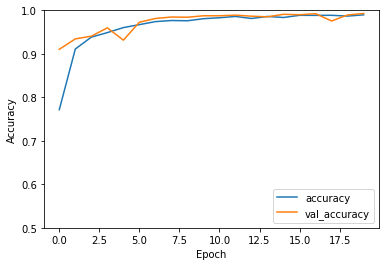

In [ ]:
# CNN MODEL

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)